In [267]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#it helps to customize the appearance of plots by setting various visual parameters
sns.set()

df = pd.read_csv("games.csv")

In [268]:
df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [269]:
df.isnull().sum()

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

In [270]:
###dataset has rating of both players, we can make new column which that show us the average rating of games
df["average_rating"] = ( df["white_rating"]+ df["black_rating"])/2

In [271]:
df.head(2)
#we can see the average_rating column

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,average_rating
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,1345.5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,1291.5


In [272]:
df.average_rating.describe()

count    20058.000000
mean      1592.731927
std        263.173825
min        816.500000
25%       1406.500000
50%       1568.750000
75%       1771.000000
max       2475.500000
Name: average_rating, dtype: float64

In [273]:
def set_limits(x):
    for n in range(700, 3001, 100):
        if x <= n:
            return f"{n - 100} - {n}"

df["rating_gaps"] = df["average_rating"].apply(set_limits)

In [274]:
df = df.drop(columns=['created_at', 'last_move_at', 'opening_eco'])

In [275]:
df.head()

,id,rated,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_name,opening_ply,average_rating,rating_gaps
0,TZJHLljE,False,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,Slav Defense: Exchange Variation,5,1345.5,1300 - 1400
1,l1NXvwaE,True,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,Nimzowitsch Defense: Kennedy Variation,4,1291.5,1200 - 1300
2,mIICvQHh,True,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,King's Pawn Game: Leonardis Variation,3,1498.0,1400 - 1500
3,kWKvrqYL,True,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,Queen's Pawn Game: Zukertort Variation,3,1446.5,1400 - 1500
4,9tXo1AUZ,True,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,Philidor Defense,5,1496.0,1400 - 1500


In [276]:
df.dtypes

id                 object
rated                bool
turns               int64
victory_status     object
winner             object
increment_code     object
white_id           object
white_rating        int64
black_id           object
black_rating        int64
moves              object
opening_name       object
opening_ply         int64
average_rating    float64
rating_gaps        object
dtype: object

RATING GAPS' DISTRBUTIONS

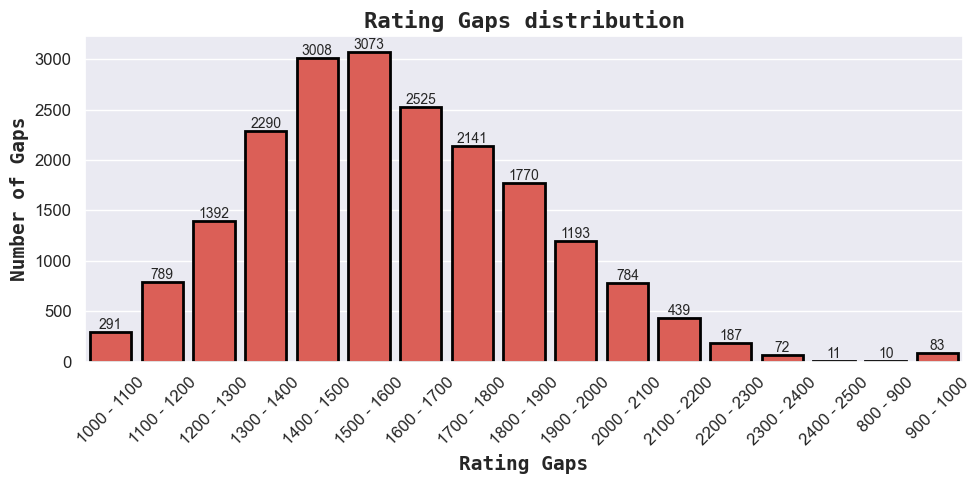

In [277]:
rating_counts = df["rating_gaps"].value_counts().sort_index()
sns.set_palette("hls")
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=rating_counts.index, y=rating_counts.values, edgecolor='black', linewidth=2, saturation=1.5)
for bar, count in zip(ax.patches, rating_counts.values):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
            f'{count}', ha='center', va='bottom', fontsize=10)

plt.title('Rating Gaps distribution', fontname='monospace', weight='bold', fontsize=16)
plt.xlabel("Rating Gaps", fontname='monospace', weight='semibold', fontsize=14)
plt.ylabel("Number of Gaps", fontname='monospace', weight='semibold', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [278]:
df.groupby('rating_gaps')['turns'].mean().sort_values()

rating_gaps
800 - 900      28.800000
1100 - 1200    49.286439
900 - 1000     50.481928
1000 - 1100    52.522337
1200 - 1300    53.189655
1300 - 1400    54.202620
1400 - 1500    56.761303
1500 - 1600    61.789782
1600 - 1700    62.106535
1700 - 1800    64.665110
2000 - 2100    64.894133
1800 - 1900    66.545198
1900 - 2000    67.639564
2100 - 2200    68.328018
2300 - 2400    69.541667
2200 - 2300    78.470588
2400 - 2500    99.636364
Name: turns, dtype: float64

WE CAN SEE THE HOW MANY MOVES/TURNS PLAYED BY OUR RATING GAPS

C:\Users\recep\AppData\Local\Temp\ipykernel_11280\1260049856.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plots = sns.barplot(x=mean_turns_by_rating.index, y=mean_turns_by_rating.values, palette=custom_palette,


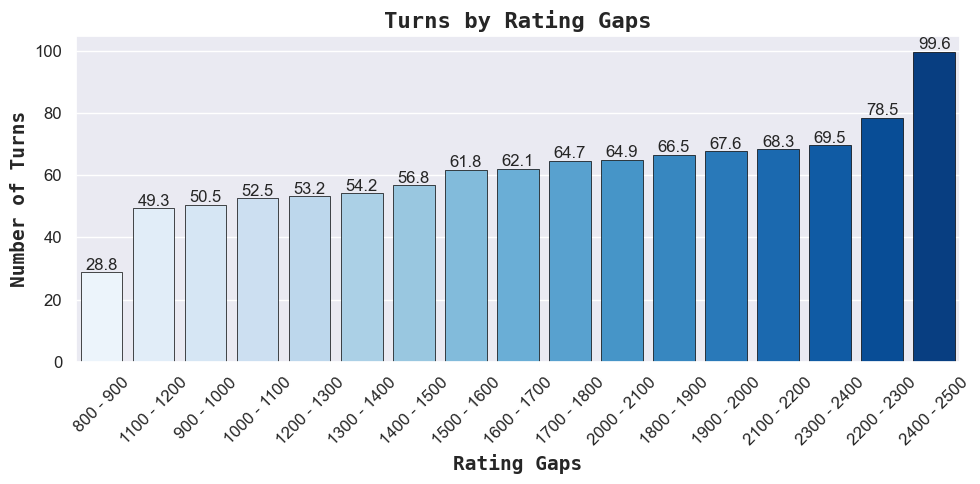

In [279]:
plt.figure(figsize=(10, 5))
custom_palette = sns.color_palette("Blues", len(df["rating_gaps"].unique()))

mean_turns_by_rating = df.groupby("rating_gaps")["turns"].mean().sort_values()

plots = sns.barplot(x=mean_turns_by_rating.index, y=mean_turns_by_rating.values, palette=custom_palette,
                    edgecolor='black', linewidth=0.5, saturation=1.5)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.1f'),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   ha='center', va='center', size=12, xytext=(0, 5),
                   textcoords='offset points')
plt.title('Turns by Rating Gaps', fontname='monospace', weight='bold', fontsize=16)
plt.xlabel("Rating Gaps", fontname='monospace', weight='semibold', fontsize=14)
plt.xticks( rotation=45, fontsize=12)
plt.ylabel("Number of Turns", fontname='monospace', weight='semibold', fontsize=14)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


From the graph above we can obviously see that the number of moves played in a game increases with the rating ranges

The greater the mutual experience/rating of the players, the more likely they are to continue the game and the more likely they are to reach the endgame

In [280]:
#We can see the all opneing names
#for opening in sorted(df['opening_name']):
    #print(opening)

In [281]:
print("Number of Openings: ", len(df['opening_name'].value_counts()))
print("Total Count       : ", df['opening_name'].value_counts().sum())

Number of Openings:  1477
Total Count       :  20058


In [282]:
#I wanted to merge rows that have the same start variant but are called by different names.
df["opening_name"].replace("King's Pawn Game", "King's Pawn", inplace = True)
df["opening_name"].replace("King's Pawn Opening", "King's Pawn", inplace = True)

df["opening_name"].replace("Old Indian Defense", "Old Indian", inplace = True)

df["opening_name"].replace("Queen's Gambit Refused", "Queen's Gambit Declined", inplace = True)
df["opening_name"].replace("Queen's Pawn Game", "Queen's Pawn", inplace = True)
df["opening_name"].replace("Queen's Pawn Opening", "Queen's Pawn", inplace = True)

df["opening_name"].replace("Ware Defense", "Ware Opening", inplace = True)

In [283]:
df["opening_name"] = df["opening_name"].apply(lambda x: x.split(":")[0])
df["opening_name"] = df["opening_name"].apply(lambda x: x.split(" |")[0])
df["opening_name"] = df["opening_name"].apply(lambda x: x.split(" #")[0])

In [284]:
df["opening_name"] = df["opening_name"].apply(lambda x: x.split(" Accepted")[0])
df["opening_name"] = df["opening_name"].apply(lambda x: x.split(" Declined")[0])
df["opening_name"] = df["opening_name"].apply(lambda x: x.split(" Refused")[0])

In [285]:
print("Number of Openings: ", len(df['opening_name'].value_counts()))
print("Total Count       : ", df['opening_name'].value_counts().sum())

Number of Openings:  127
Total Count       :  20058


In [286]:
opening_counts = df['opening_name'].value_counts()
df2 = df[df['opening_name'].isin(opening_counts[opening_counts > 75].index)]

In [287]:
df2['opening_name'].value_counts()

opening_name
Sicilian Defense         2632
French Defense           1412
Queen's Pawn Game        1091
Italian Game              981
Queen's Gambit            912
King's Pawn Game          861
Ruy Lopez                 858
English Opening           720
Scandinavian Defense      716
Philidor Defense          691
Caro-Kann Defense         597
Scotch Game               465
Four Knights Game         370
Van't Kruijs Opening      368
Zukertort Opening         336
Bishop's Opening          323
Indian Game               319
Pirc Defense              288
Queen's Pawn              271
Russian Game              252
Slav Defense              240
King's Gambit             237
Modern Defense            225
Nimzowitsch Defense       224
Horwitz Defense           209
King's Indian Defense     197
Alekhine Defense          192
King's Knight Opening     183
Hungarian Opening         179
Center Game               172
Owen Defense              171
Nimzo-Larsen Attack       164
Bird Opening              1

In [288]:
print(len(df2['opening_name'].value_counts()))
print(df2['opening_name'].value_counts().sum())

45
18303


The heatmap can show us the frequency of use of each opening by rating gap.

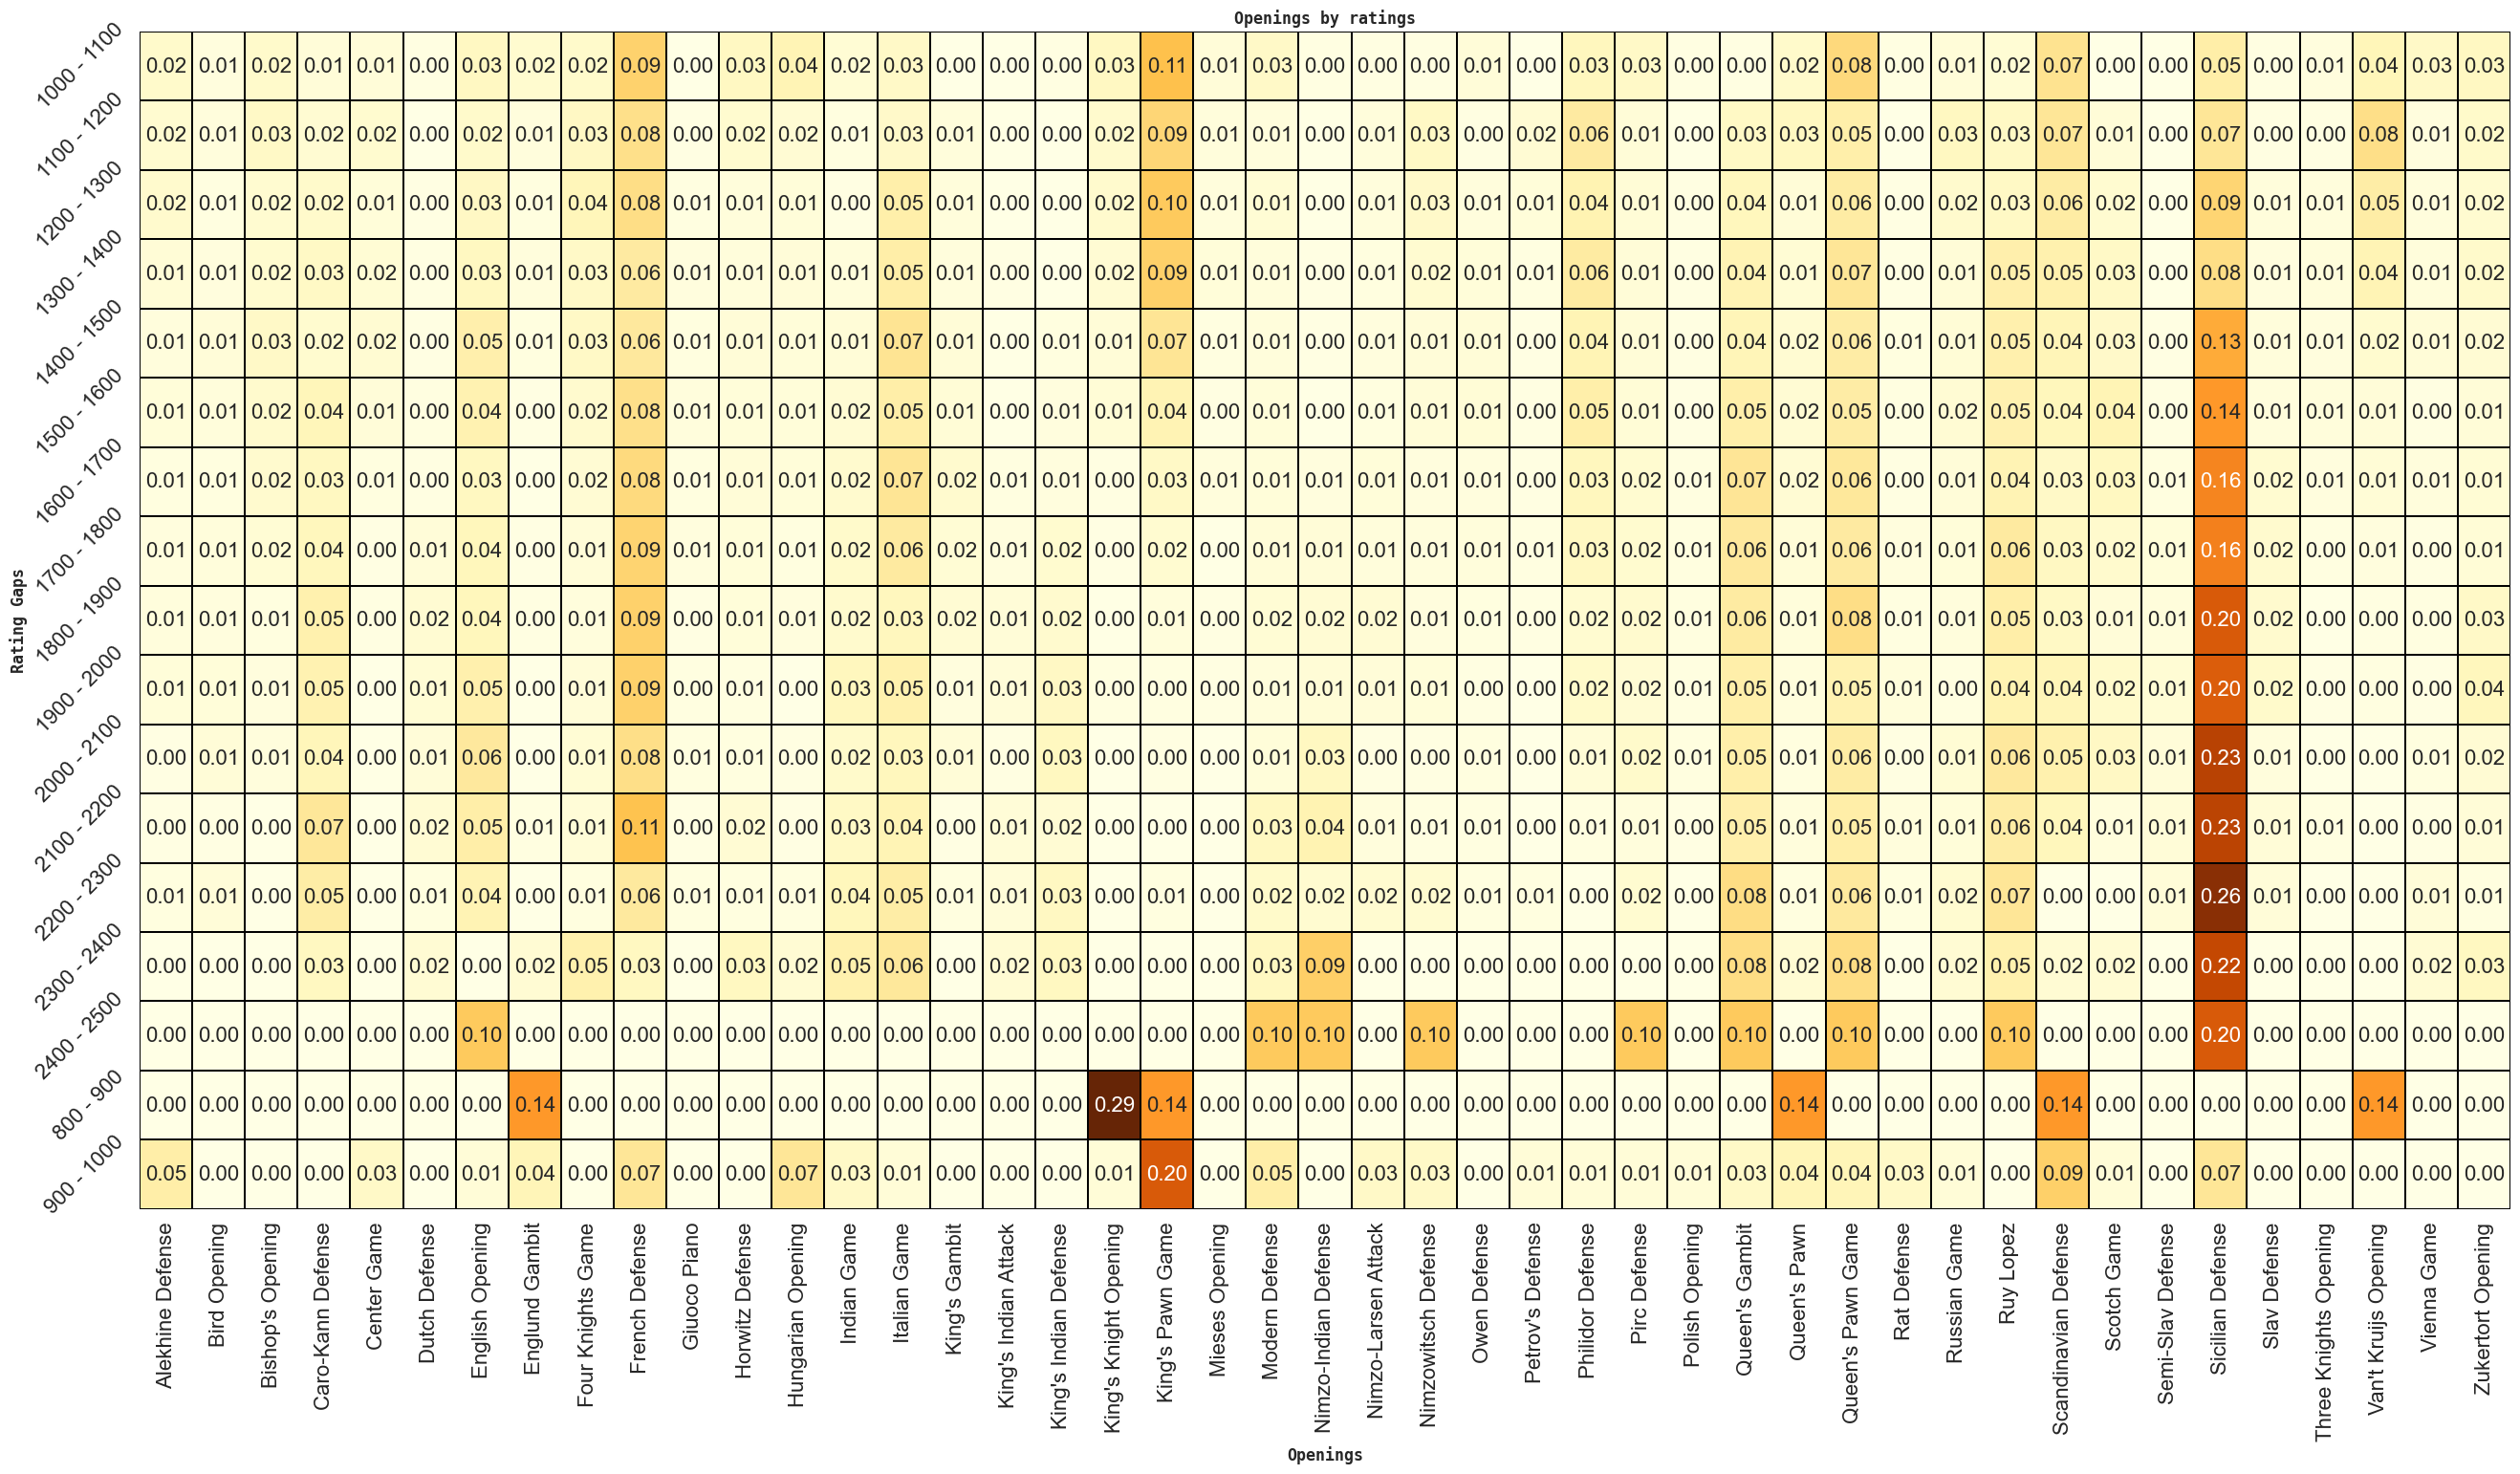

In [289]:
i = df2.groupby(["rating_gaps", "opening_name"]).size().unstack().fillna(0).astype(int)
fig, ax = plt.subplots(figsize=(32, 16))

sns.heatmap(i.apply(lambda x: x/x.sum(), axis=1), xticklabels=True, yticklabels=True, cmap='YlOrBr',
        annot=True, linewidths=0.005, linecolor='black', annot_kws={"fontsize":16}, fmt='.2f', cbar=False)

plt.title('Openings by ratings', fontname = 'monospace', weight='bold')
plt.xticks(fontsize = 16)
plt.xlabel("Openings", fontname = 'monospace', weight='semibold')
plt.yticks(fontsize=16, rotation = 45)
plt.ylabel("Rating Gaps", fontname = 'monospace', weight='semibold')
plt.show()
del i

1-)Sicilian Defense - The higher a player's rating, the more likely they are to face this opening.

2-)King Pawn - progressively decreases as the rating increases. This means that the higher a player's rating, the less probability he has to face this opening.

3-)Scandinavian Defence - same as King's Pawn

In [290]:
df3 = df.groupby(["rating_gaps", "winner"]).size().unstack(fill_value=0)
df3 = df3.div(df3.sum(axis=1), axis=0)
df3 = (df3 * 100).round(2)

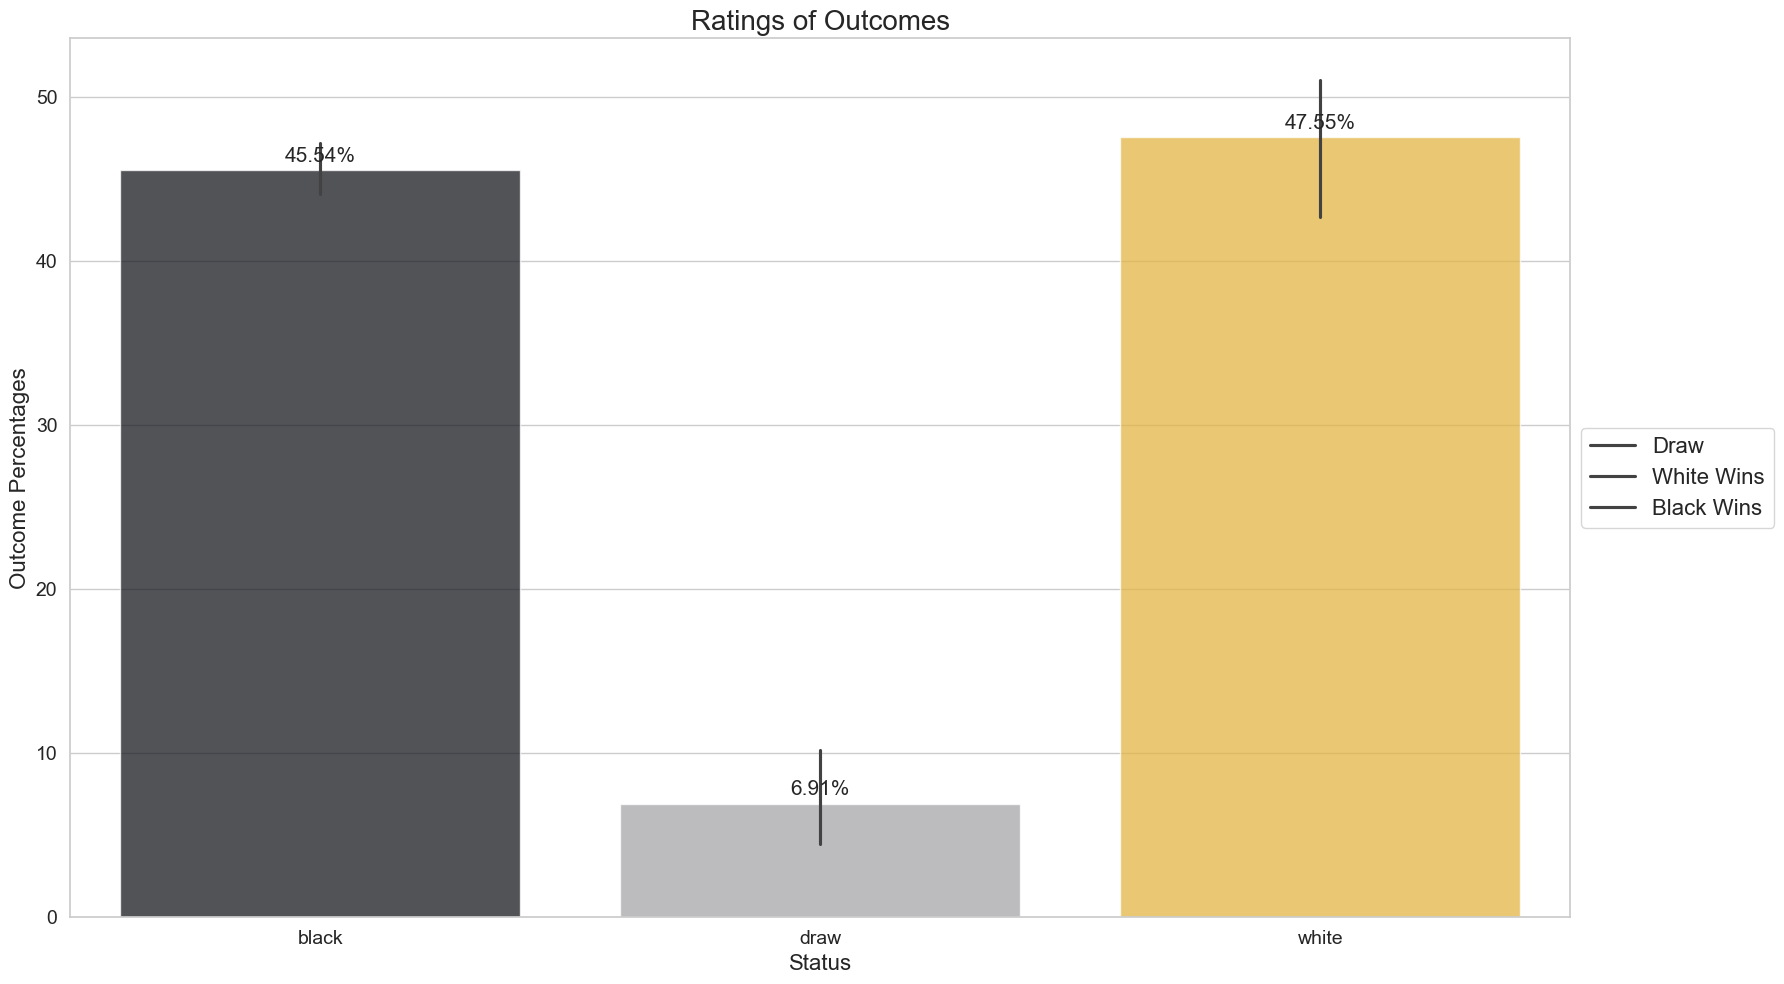

In [291]:
plt.figure(figsize=(18, 10))
sns.set_style("whitegrid")

sns.barplot(data=df3, alpha=0.75, palette=['#171820', '#a6a6a8', '#fdc029'])
for ax in plt.gcf().axes:
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=15, xytext=(0, 10), textcoords='offset points')
        
plt.title("Ratings of Outcomes", fontsize=20)
plt.xlabel("Status", fontsize=16)
plt.ylabel("Outcome Percentages", fontsize=16)
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14)
plt.legend(["Draw", "White Wins", "Black Wins"], loc='center left', bbox_to_anchor=(1.0, 0.5), prop={'size': 16})
plt.tight_layout()
plt.show()


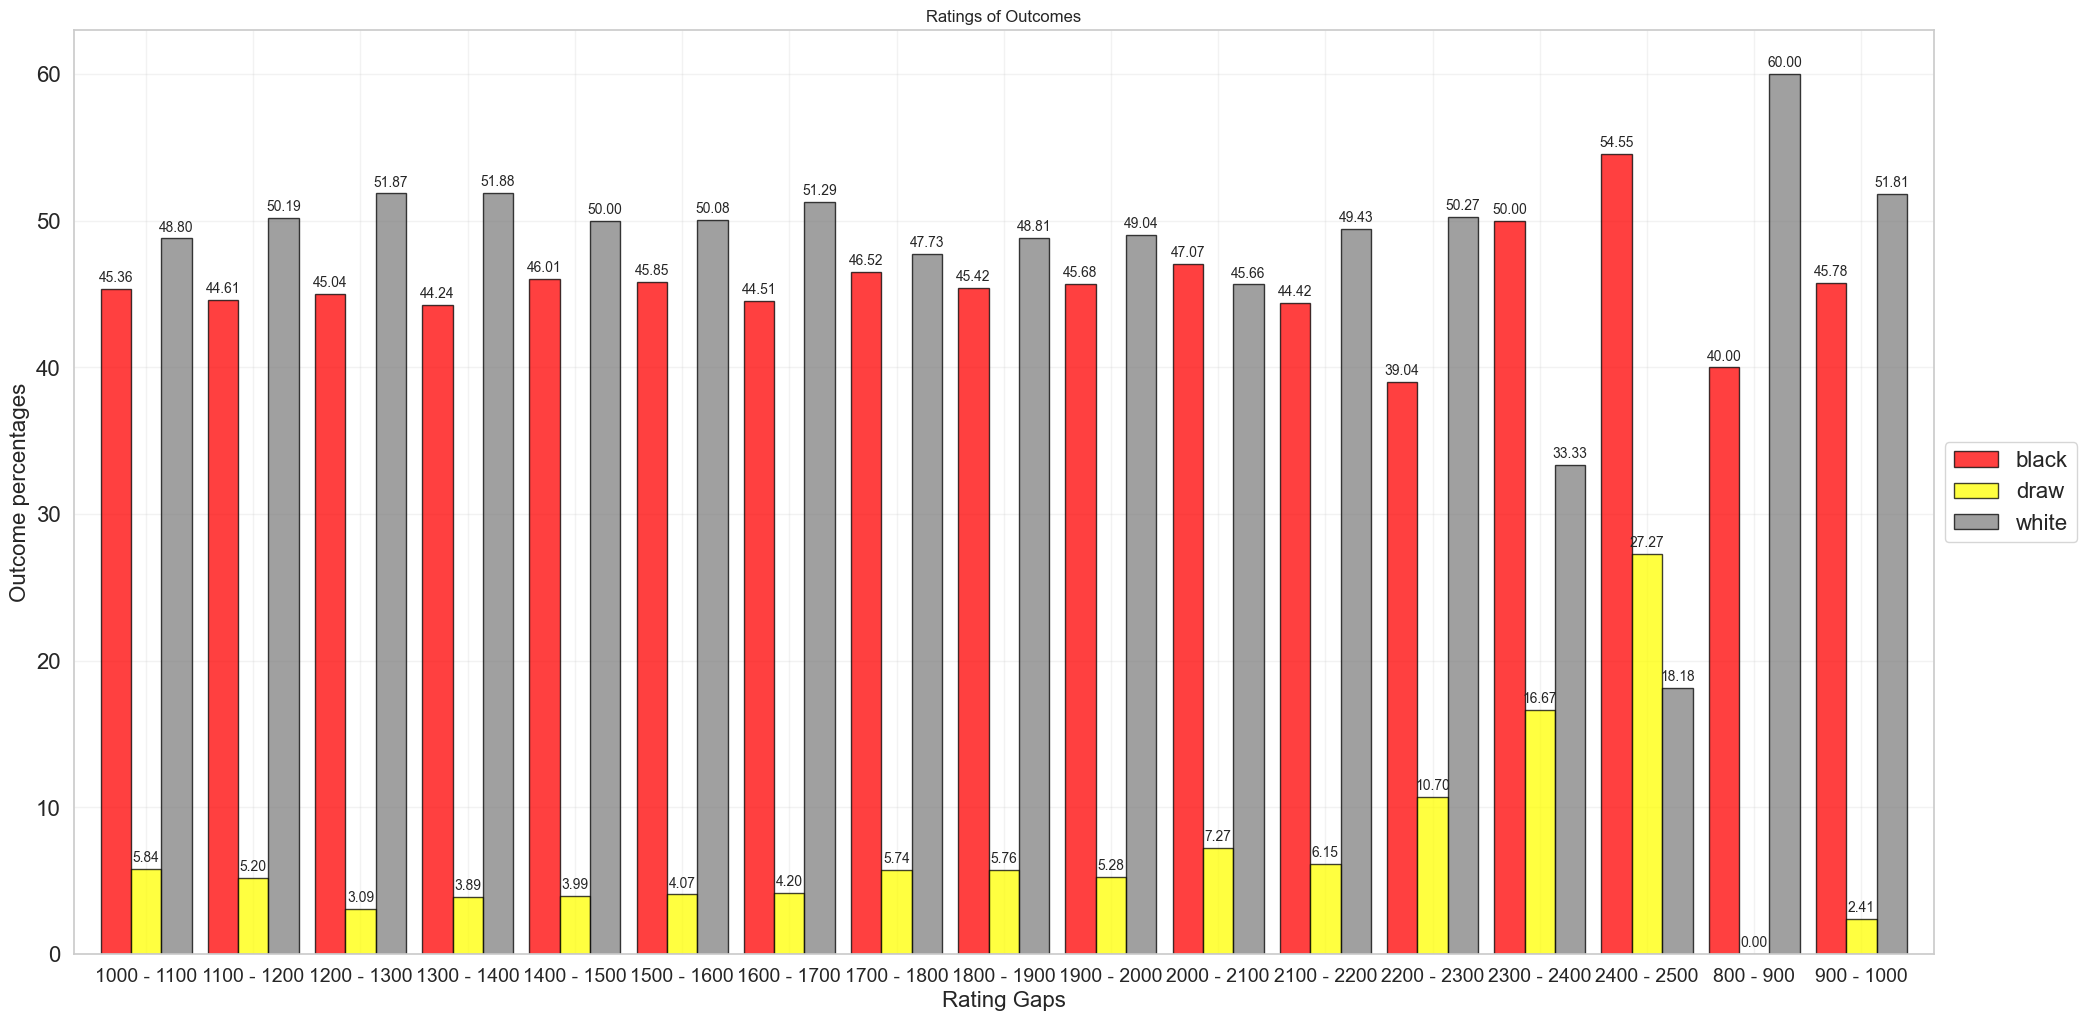

In [292]:
plots = df3.plot(kind = "bar", alpha=0.75, color=['red', 'yellow', 'gray'], figsize = (24, 12),
    width = 0.85, title = "Ratings of Outcomes", edgecolor = "black")

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

plots.grid(alpha = 0.25)    
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), prop={'size': 16})
plt.xlabel("Rating Gaps", fontsize = 16)
plt.xticks(fontsize = 14, rotation = 0)
plt.ylabel("Outcome percentages", fontsize = 16)
plt.yticks(fontsize=16)
plt.show()

In [293]:
df2.groupby("opening_name")["turns"].mean()

opening_name
Alekhine Defense         58.359375
Bird Opening             55.114650
Bishop's Opening         55.433437
Caro-Kann Defense        64.613065
Center Game              54.360465
Dutch Defense            60.720000
English Opening          62.840278
Englund Gambit           59.528736
Four Knights Game        61.545946
French Defense           61.223796
Giuoco Piano             58.194444
Horwitz Defense          58.722488
Hungarian Opening        63.212291
Indian Game              65.673981
Italian Game             57.477064
King's Gambit            56.991561
King's Indian Attack     61.136364
King's Indian Defense    70.756345
King's Knight Opening    52.049180
King's Pawn Game         56.580720
Mieses Opening           50.718447
Modern Defense           65.320000
Nimzo-Indian Defense     66.662420
Nimzo-Larsen Attack      63.176829
Nimzowitsch Defense      56.995536
Owen Defense             57.754386
Petrov's Defense         57.929412
Philidor Defense         63.037627
Pirc De

In [294]:
mean_turns_by_opening = df2.groupby("opening_name")["turns"].mean()
mean_turns_by_opening_sorted = mean_turns_by_opening.sort_values(ascending=False)
mean_turns_by_opening_sorted

opening_name
King's Indian Defense    70.756345
Semi-Slav Defense        69.518519
Nimzo-Indian Defense     66.662420
Indian Game              65.673981
Queen's Pawn Game        65.414299
Modern Defense           65.320000
Caro-Kann Defense        64.613065
Rat Defense              64.282609
Slav Defense             64.183333
Ruy Lopez                63.393939
Hungarian Opening        63.212291
Nimzo-Larsen Attack      63.176829
Philidor Defense         63.037627
English Opening          62.840278
Sicilian Defense         62.786094
Queen's Gambit           62.348684
Vienna Game              61.868613
Four Knights Game        61.545946
French Defense           61.223796
King's Indian Attack     61.136364
Polish Opening           60.951807
Dutch Defense            60.720000
Pirc Defense             59.791667
Three Knights Opening    59.538462
Englund Gambit           59.528736
Horwitz Defense          58.722488
Zukertort Opening        58.446429
Alekhine Defense         58.359375
Giuoco 

In [295]:
df2.groupby("opening_name")["turns"].mean().index

Index(['Alekhine Defense', 'Bird Opening', 'Bishop's Opening',
       'Caro-Kann Defense', 'Center Game', 'Dutch Defense', 'English Opening',
       'Englund Gambit', 'Four Knights Game', 'French Defense', 'Giuoco Piano',
       'Horwitz Defense', 'Hungarian Opening', 'Indian Game', 'Italian Game',
       'King's Gambit', 'King's Indian Attack', 'King's Indian Defense',
       'King's Knight Opening', 'King's Pawn Game', 'Mieses Opening',
       'Modern Defense', 'Nimzo-Indian Defense', 'Nimzo-Larsen Attack',
       'Nimzowitsch Defense', 'Owen Defense', 'Petrov's Defense',
       'Philidor Defense', 'Pirc Defense', 'Polish Opening', 'Queen's Gambit',
       'Queen's Pawn', 'Queen's Pawn Game', 'Rat Defense', 'Russian Game',
       'Ruy Lopez', 'Scandinavian Defense', 'Scotch Game', 'Semi-Slav Defense',
       'Sicilian Defense', 'Slav Defense', 'Three Knights Opening',
       'Van't Kruijs Opening', 'Vienna Game', 'Zukertort Opening'],
      dtype='object', name='opening_name')

In [296]:
df5 = df2.groupby(["winner", "opening_name"]).size().unstack().fillna(0).astype(int)
df5 = df5.div(df5.sum(axis=0), axis=1).mul(100).round(2).transpose()
df5 = df5.reindex(["King's Indian Defense", "Semi-Slav Defense", "Nimzo-Indian Defense",
       "Indian Game", "Modern Defense", 'Caro-Kann Defense', 'Slav Defense',
       "Queen's Pawn", 'Ruy Lopez', 'Hungarian Opening', 'Nimzo-Larsen Attack',
       'Philidor Defense', 'English Opening', 'Sicilian Defense',
       "Queen's Gambit", 'Vienna Game', 'Four Knights Game', 'French Defense',
       'Dutch Defense', 'Pirc Defense', 'Three Knights Opening',
       'Horwitz Defense', 'Zukertort Opening', 'Alekhine Defense',
       'Giuoco Piano', 'Owen Defense', 'Italian Game', 'Nimzowitsch Defense',
       "King's Gambit", 'Scandinavian Defense', 'Scotch Game',
       "Bishop's Opening", "Van't Kruijs Opening", 'Russian Game',
       'Bird Opening', 'Center Game', "King's Pawn", "King's Knight Opening",
       'Mieses Opening'])

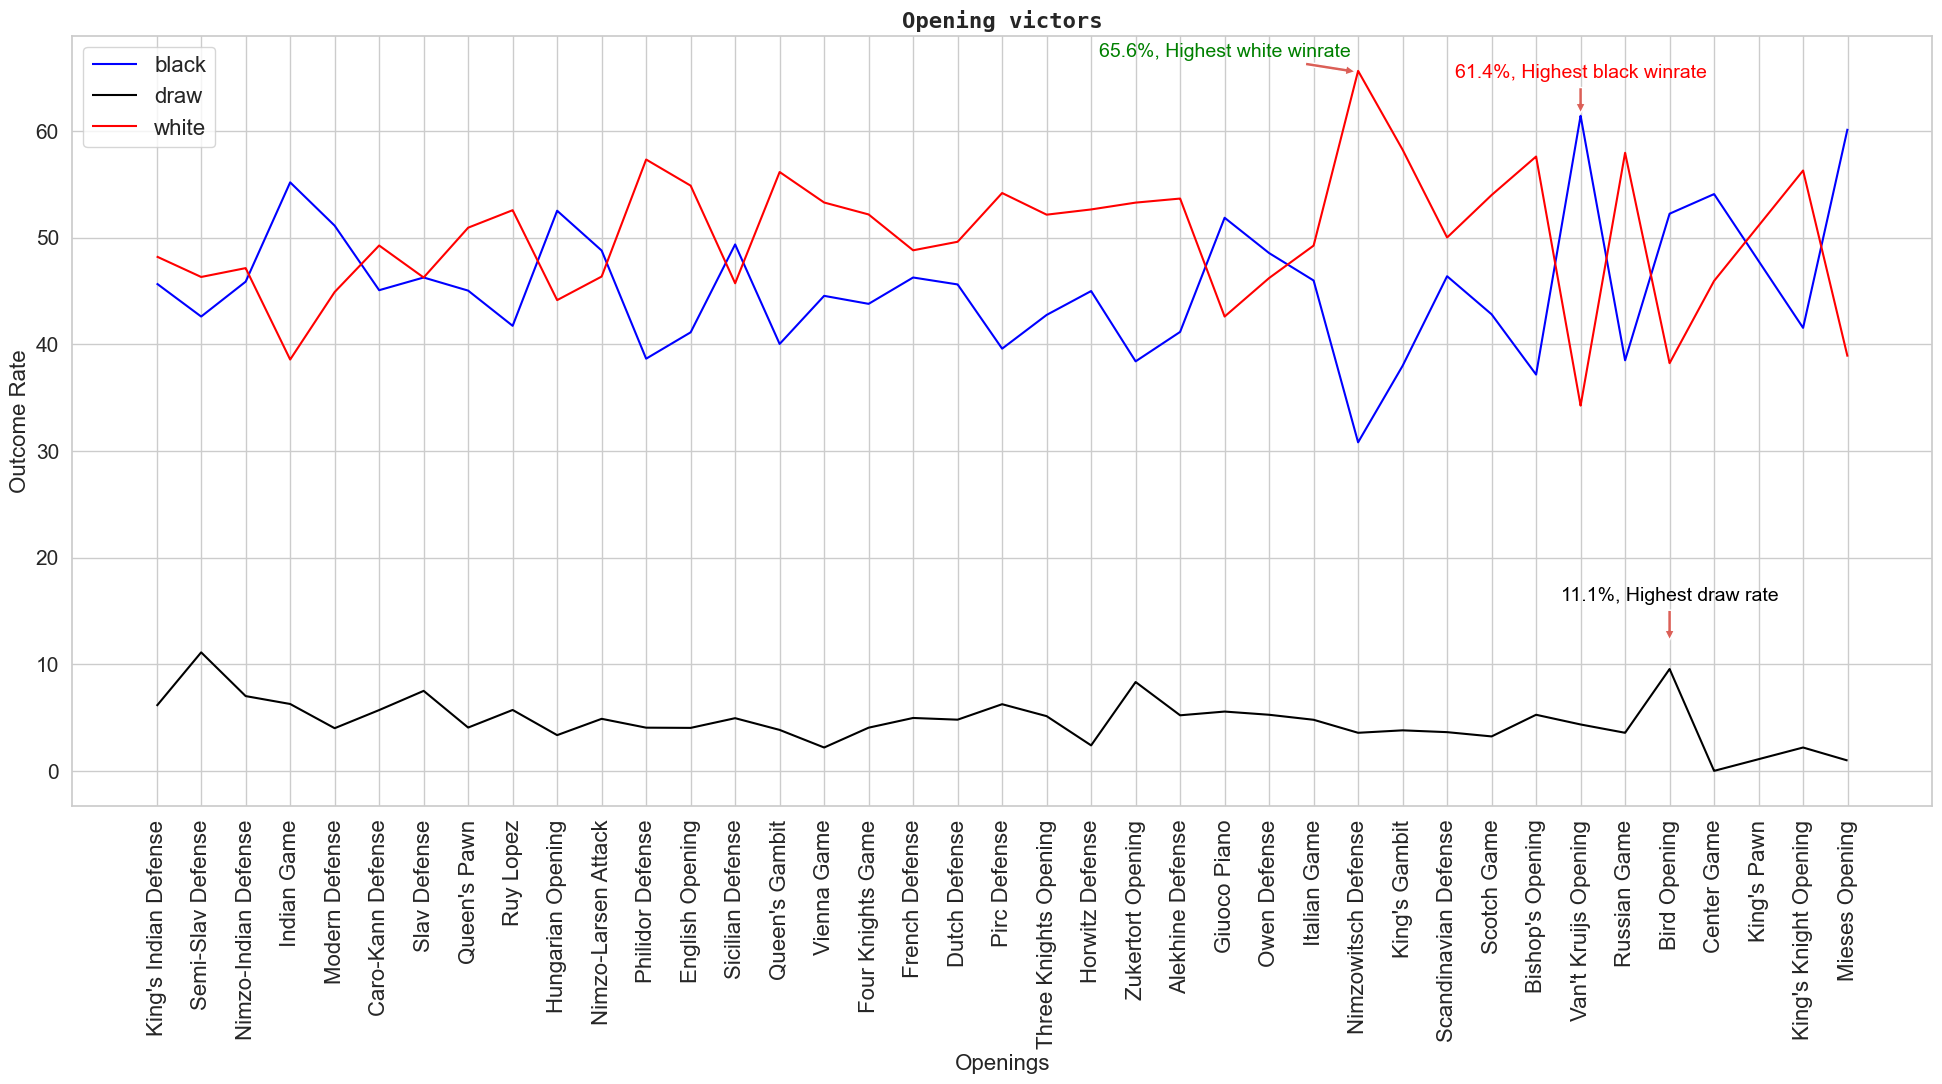

In [297]:
fig, ax = plt.subplots(figsize=(24, 10))
sns.lineplot(data=df5, palette=['blue', 'black', 'red'], dashes=[(1, 0), (1, 0), (1, 0)], sort=False)
plt.annotate("61.4%, Highest black winrate", xy=(32, 61.4), xytext=(32, 65), horizontalalignment="center",
             arrowprops=dict(arrowstyle='simple', lw=1), fontsize=14, color='red')
plt.annotate("11.1%, Highest draw rate", xy=(34, 12), xytext=(34, 16), horizontalalignment="center",
             arrowprops=dict(arrowstyle='simple', lw=1), fontsize=14, color='black')
plt.annotate("65.6%, Highest white winrate", xy=(27, 65.5), xytext=(24, 67), horizontalalignment="center",
             arrowprops=dict(arrowstyle='simple', lw=1), fontsize=14, color='green')

plt.title('Opening victors', fontname='monospace', weight='bold', fontsize=16)
plt.legend(prop={'size': 16})
plt.xlabel("Openings", fontsize=16)
plt.xticks(fontsize=16, rotation=90)
plt.ylabel("Outcome Rate", fontsize=16)
plt.yticks(fontsize=15)

plt.show()


1-)11/39 openings are in favor of the "black" player. Two of them have a win rate of 60%+ (Van't Kruijs Opening - 61.41% and Mieses Opening - 60.19%).

2-)The highest win rate belongs to the "white" players of the Nimzowitsch Defense with 65.62%

In [298]:
victory_counts_sorted = df2["victory_status"].value_counts().sort_index(ascending=False)
total_count = victory_counts_sorted.sum()
for status, count in victory_counts_sorted.items():
    percentage = (count / total_count) * 100
    print(f"{status}: {percentage:.2f}%")

resign: 55.74%
outoftime: 8.30%
mate: 31.40%
draw: 4.55%


In [299]:
df7 = df2.groupby(["victory_status", "opening_name"]).size().unstack().fillna(0).astype(int)
df7 = df7.div(df7.sum(axis=0), axis=1).mul(100).round(2).transpose()
df7 = df7.reindex(["King's Indian Defense", "Semi-Slav Defense", "Nimzo-Indian Defense",
       "Indian Game", "Modern Defense", 'Caro-Kann Defense', 'Slav Defense',
       "Queen's Pawn", 'Ruy Lopez', 'Hungarian Opening', 'Nimzo-Larsen Attack',
       'Philidor Defense', 'English Opening', 'Sicilian Defense',
       "Queen's Gambit", 'Vienna Game', 'Four Knights Game', 'French Defense',
       'Dutch Defense', 'Pirc Defense', 'Three Knights Opening',
       'Horwitz Defense', 'Zukertort Opening', 'Alekhine Defense',
       'Giuoco Piano', 'Owen Defense', 'Italian Game', 'Nimzowitsch Defense',
       "King's Gambit", 'Scandinavian Defense', 'Scotch Game',
       "Bishop's Opening", "Van't Kruijs Opening", 'Russian Game',
       'Bird Opening', 'Center Game', "King's Pawn", "King's Knight Opening",
       'Mieses Opening'])

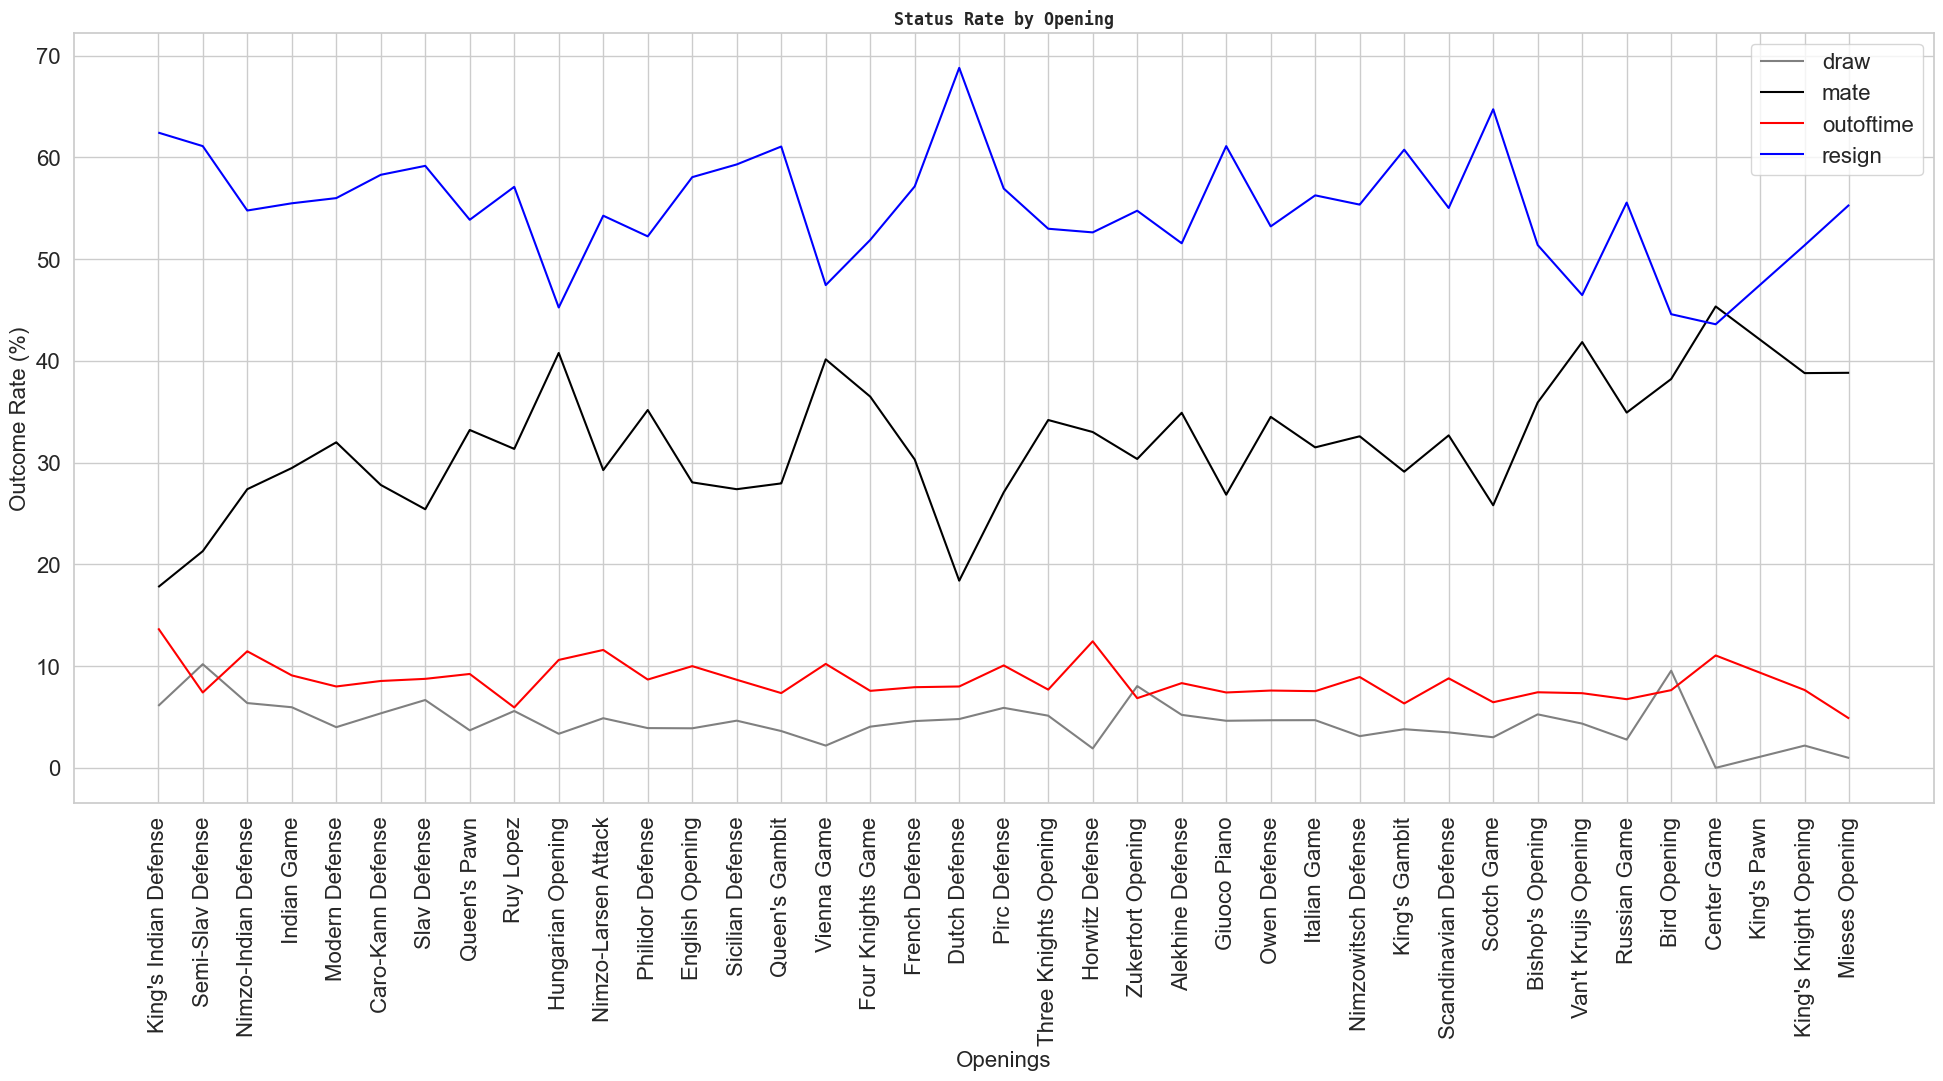

In [300]:
fig, ax = plt.subplots(figsize=(24, 10))
sns.lineplot(data = df7, palette=['grey', "black", 'red','blue'], dashes=[(1, 0), (1, 0), (1, 0), (1, 0)],
            sort = False)
plt.title('Status Rate by Opening', 
          fontname = 'monospace', weight='bold')
plt.legend(prop={'size': 16})
plt.xlabel("Openings", fontsize = 16)
plt.xticks(fontsize = 16, rotation = 90)
plt.ylabel("Outcome Rate (%)", fontsize = 16)
plt.yticks(fontsize=16)

plt.show()

In [301]:
df2[(df2["winner"] == "draw") & (df2["victory_status"] != "draw")]
len(df2[(df2["winner"] == "draw") & (df2["victory_status"] != "draw")])

43